In [52]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
#url for amazon best seller smart phones
url = "https://www.amazon.in/gp/bestsellers/electronics/1805560031"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
#type(soup)
title = soup.title
print(title)
no_pages = 2#There are two pages 

def get_data(pageNo):  
    
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.in/gp/bestsellers/electronics/1805560031/ref=zg_bs_nav_e_4_1805559031'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content

    soup = BeautifulSoup(content,"lxml")
    #print(soup)
#
    all = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'zg-text-center-align'})
        n = name.find_all('img', alt=True)
       
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]
        # Name of Model
        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")


        # Rating for Model
        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')
        # Number of Reviews
        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('Price Not Available')
        all.append(all1)    
    return all
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Model','Rating','Customers_Rated', 'Price'])
df["Brand"]=''
for i in range(len(df["Model"])):
  df["Brand"][i]=df["Model"][i].split()[0]
df["Model"][1].split()[0]

df.to_excel('amazon_smart_phones.xlsx', index=False)
df


<title dir="ltr">Amazon.in Bestsellers: The most popular items in Smartphones</title>


,Model,Rating,Customers_Rated,Price,Brand
0,"OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB...",4.2 out of 5 stars,946,"₹29,999.00",OnePlus
1,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.1 out of 5 stars,"75,493","₹12,999.00",Redmi
2,"OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...",4.2 out of 5 stars,946,"₹29,999.00",OnePlus
3,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2 out of 5 stars,"69,081","₹8,999.00",Redmi
4,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,"71,574","₹6,999.00",Redmi
...,...,...,...,...,...
95,"Redmi Note 10T 5G (Metallic Blue, 6GB RAM, 128...",-1,0,Price Not Available,Redmi
96,"Samsung Galaxy M02s (Blue,4GB RAM, 64GB Storag...",4.1 out of 5 stars,"12,179","₹10,499.00",Samsung
97,"OnePlus Nord CE 5G (Blue Void, 8GB RAM, 128GB ...",4.1 out of 5 stars,"21,286","₹24,999.00",OnePlus
98,"Samsung Galaxy M42 5G (Prism Dot Gray, 8GB RAM...",4.1 out of 5 stars,"6,497","₹23,999.00",Samsung


Text(0.5,1,'Number of Models for Various Brands')

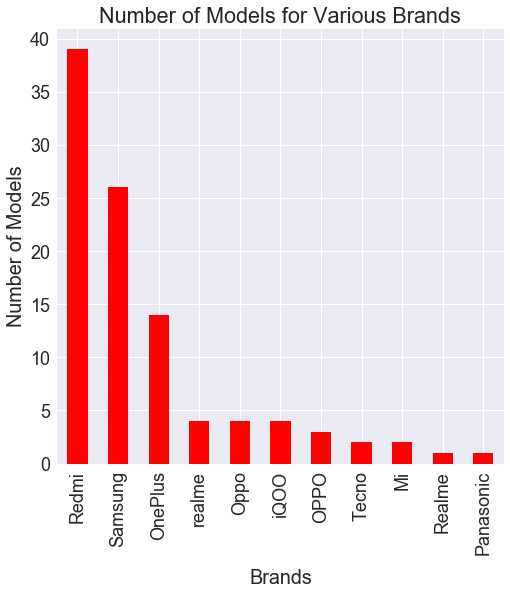

In [51]:
#count various brands
df["Brand"].value_counts()
sns.set(font_scale=1.8)

#plot various number of models per brand
df["Brand"].value_counts().plot(kind='bar',color='r', figsize=(8, 8),rot=90)


#x axis label
plt.xlabel("Brands", labelpad=14)

#yaxis label
plt.ylabel("Number of Models")

#giving title for the graph
plt.title("Number of Models for Various Brands")


In [135]:
#Selecting OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB) Model and finding its Rating,customer names who brought it


import matplotlib.pyplot as plt
import re
import pandas as pd
from datetime import datetime
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests
pageNo = 66 #find last pagenumber
reviews=[]
cname=[]
Rating=[]
def get_data(pageNo):
  cust_name = []
  review_content = []
  rate = []   
  headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
   
  page = requests.get('https://www.amazon.in/OnePlus-Sierra-Storage-Rs-1000-Exchange/product-reviews/B097RDVDL2/ref=cm_cr_getr_d_paging_btm_next'+str(pageNo)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(pageNo), headers=headers)#, proxies=proxies)
  page.content
  soup = bs(page.content,'html.parser')
  names = soup.find_all('span',class_='a-profile-name')
  #print("len of names:",len(names))
   
  for i in range(0,len(names)):

    cust_name.append(names[i].get_text())
#cust_name
  for c in cust_name:
    cname.append(c)
  rating = soup.find_all('i',class_='review-rating')
#rating
    
  for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
    #print(len(rate),rate)
  for r in rate:
    Rating.append(r)  
  review = soup.find_all("span",class_="review-text-content")
#review
  
  for i in range(0,len(review)):
    review_content.append(review[i].get_text())
#review_content
  review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
  review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
  for r in review_content:
    reviews.append(r)

  return 
for i in range(1,pageNo+1):
    t=get_data(i)
df1=pd.DataFrame(reviews)
df1.rename(columns={0:"Reviews"},inplace=True)
df2=pd.DataFrame(cname)
df3=pd.DataFrame(Rating)

df1.to_csv("reviews2",index=False)
df1


,Reviews
0,First of all I would like to tell you that i...
1,I have purchased this phone in exchange of g...
2,Received my unit 4hr ago and here is what I ...
3,7/28:Received this yesterday and first impre...
4,-The refresh rate is just awesome-Camera is ...
...,...
603,Excellent
604,Fast processor with excellent touch sensitiv...
605,The specifications really met the expectatio...
606,It's Awesome👍👍


In [136]:


import matplotlib.pyplot as plt
import re
import pandas as pd
from datetime import datetime
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests
pageNo = 66 #find last pagenumber
reviews=[]
cname=[]
Rating=[]
def get_data(pageNo):
  cust_name = []
  review_content = []
  rate = []   
  headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
   
  page = requests.get('https://www.amazon.in/OnePlus-Sierra-Storage-Rs-1000-Exchange/product-reviews/B097RDVDL2/ref=cm_cr_getr_d_paging_btm_next'+str(pageNo)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(pageNo), headers=headers)#, proxies=proxies)
  page.content
  soup = bs(page.content,'html.parser')
  names = soup.find_all('span',class_='a-profile-name')
  #print("len of names:",len(names))
   
  for i in range(0,len(names)):

    cust_name.append(names[i].get_text())
#cust_name
  for c in cust_name:
    cname.append(c)
  rating = soup.find_all('i',class_='review-rating')
#rating
    
  for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
    #print(len(rate),rate)
  for r in rate:
    Rating.append(r)  
  review = soup.find_all("span",class_="review-text-content")
#review
  
  for i in range(0,len(review)):
    review_content.append(review[i].get_text())
#review_content
  review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
  review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
  for r in review_content:
    reviews.append(r)

  return 
for i in range(1,pageNo+1):
    t=get_data(i)
df1=pd.DataFrame(reviews)
df1.rename(columns={0:"Reviews"},inplace=True)
df2=pd.DataFrame(cname)
df3=pd.DataFrame(Rating)
df1

,Reviews
0,First of all I would like to tell you that i...
1,I have purchased this phone in exchange of g...
2,Received my unit 4hr ago and here is what I ...
3,7/28:Received this yesterday and first impre...
4,-The refresh rate is just awesome-Camera is ...
...,...
593,Excellent
594,Fast processor with excellent touch sensitiv...
595,The specifications really met the expectatio...
596,It's Awesome👍👍


#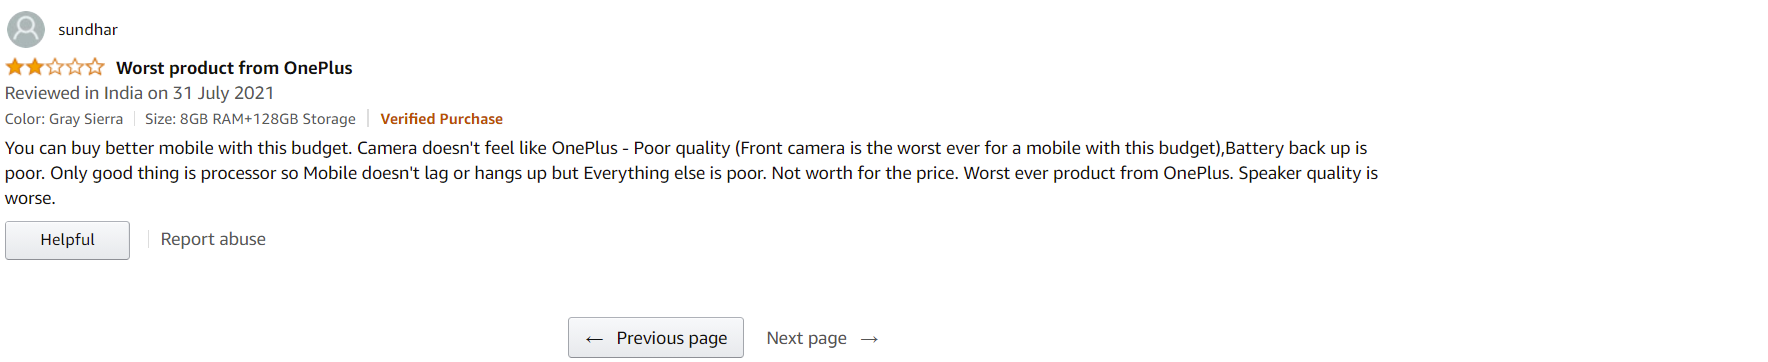
#as per the web link this is the last review

In [91]:
df2=pd.DataFrame(cname)
df2.rename(columns={0: "customer name"},inplace=True)
df2

,customer name
0,RAVI RANJAN
1,Manny
2,RAVI RANJAN
3,Naveen Jha
4,Harsimran
...,...
667,Reshma
668,Sudarvanna Pillai
669,Manish
670,Amazon Customer


In [95]:
df3=pd.DataFrame(Rating)
df3.rename(columns={0:"Rating"},inplace=True)
df3

,Rating
0,5.0 out of 5 stars
1,1.0 out of 5 stars
2,5.0 out of 5 stars
3,5.0 out of 5 stars
4,4.0 out of 5 stars
...,...
667,1.0 out of 5 stars
668,5.0 out of 5 stars
669,5.0 out of 5 stars
670,3.0 out of 5 stars


In [111]:
df2.rename(columns={0: "customer name"},inplace=True)
df3.rename(columns={0:"Rating"},inplace=True)
df=pd.concat([df2,df3],axis=1)
df
df.to_csv("name_and_rating.csv",index=False)

In [128]:
#Selecting OnePlus Nord 2 5G (Gray Sierra, 8GB RAM, 128GB) Model and finding its Rating,customer names who brought it


import matplotlib.pyplot as plt
import re
import pandas as pd
from datetime import datetime
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests
pageNo = 66 #find last pagenumber
reviews=[]
cname=[]
Rating=[]
def get_data(pageNo):
  cust_name = []
  review_content = []
  rate = []   
  headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
   
  page = requests.get('https://www.amazon.in/OnePlus-Sierra-Storage-Rs-1000-Exchange/product-reviews/B097RDVDL2/ref=cm_cr_getr_d_paging_btm_next'+str(pageNo)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(pageNo), headers=headers)#, proxies=proxies)
  page.content
  soup = bs(page.content,'html.parser')
  names = soup.find_all('span',class_='a-profile-name')
  #print("len of names:",len(names))
   
  for i in range(0,len(names)):

    cust_name.append(names[i].get_text())
#cust_name
  for c in cust_name:
    cname.append(c)
  rating = soup.find_all('i',class_='review-rating')
#rating
    
  for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
    #print(len(rate),rate)
  for r in rate:
    Rating.append(r)  
  review = soup.find_all("span",class_="review-text-content")
#review
  
  for i in range(0,len(review)):
    review_content.append(review[i].get_text())
#review_content
  review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
  review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
  for r in review_content:
    reviews.append(r)

  return 
for i in range(1,pageNo+1):
    t=get_data(i)
df1=pd.DataFrame(reviews)
df1.rename(columns={0:"Reviews"},inplace=True)
df2=pd.DataFrame(cname)
df3=pd.DataFrame(Rating)
df2.rename(columns={0: "customer name"},inplace=True)
df3.rename(columns={0:"Rating"},inplace=True)
df=pd.concat([df2,df3,df1],axis=1)
df.to_csv("productdataframe.csv",index=False)
df

,customer name,Rating,Reviews
0,RAVI RANJAN,5.0 out of 5 stars,First of all I would like to tell you that i...
1,Manny,1.0 out of 5 stars,I have purchased this phone in exchange of g...
2,RAVI RANJAN,5.0 out of 5 stars,Received my unit 4hr ago and here is what I ...
3,Naveen Jha,5.0 out of 5 stars,7/28:Received this yesterday and first impre...
4,Harsimran,4.0 out of 5 stars,-The refresh rate is just awesome-Camera is ...
...,...,...,...
591,MD m.,5.0 out of 5 stars,NaN
592,Satya,5.0 out of 5 stars,NaN
593,Veteran User,5.0 out of 5 stars,NaN
594,Nirmal,5.0 out of 5 stars,NaN
